<a href="https://colab.research.google.com/github/ersjunior/3DTS-DataProcessingWithPython/blob/main/Desafios/desafio_A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Final


## Regressão Logistica: Exercício

* Monte um algoritmo preditivo de classificação, utilizando Regressão Logística.

* Para tal, selecione uma base de dados adequada no https://www.kaggle.com/datasets.

* Antes de realizar o treino do seu algoritmo realize uma análise exploratória, principalmente correlacionando as features e o label. Identificados estes, siga o processo de treinar, validar, testar e revalidar. Não esqueça de apresentar sua conclusões de negócio (utilize o botão +texto)

#### Descrição do conjunto de dados
#### Visão geral

Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv) e conjunto de teste (test.csv)

* O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como “verdade básica”) para cada passageiro. Seu modelo será baseado em “características” como gênero e classe dos passageiros. Você também pode usar a engenharia de recursos para criar novos recursos.

* O conjunto de teste deve ser usado para ver o desempenho do seu modelo em dados não vistos. Para o conjunto de teste, não fornecemos a verdade básica para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de teste, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic.

* Também incluímos gender_submission.csv , um conjunto de previsões que assumem que todas e apenas as passageiras sobrevivem, como um exemplo de como deve ser um arquivo de envio.

#### Dicionário de dados
* Variável    |     Definição      | Chave
-------------------------------------------------------------------------------
sobrevivência |	   Sobrevivência   |	0 = Não, 1 = Sim

pclass        | classe de ingresso |	1 = 1º, 2 = 2º, 3 = 3º

sexo          | Sexo

Idade         |	Idade em anos

sibsp         |	Nº de irmãos/cônjuges a bordo do Titanic

pergaminho    | Nº de pais/filhos a bordo do Titanic

bilhete       |	Número do bilhete

tarifa        | Tarifa de passageiro

cabine        | número da cabine

embarcou      | Porto de embarcação | C = Cherbourg, Q = Queenstown, S = Southampton

-------------------------------------------------------------------------------

#### Notas Variáveis

* pclass : Um proxy para status socioeconômico (SES)

  1º = Superior | 2º = Médio | 3º = Menor

* idade : A idade é fracionária se for menor que 1. Se a idade for estimada, está na forma de xx,5

* sibsp : O conjunto de dados define as relações familiares desta forma...

* Irmão = irmão, irmã, meio-irmão, meia-irmã

* Cônjuge = marido, esposa (amantes e noivos foram ignorados)

* parch : O conjunto de dados define as relações familiares desta forma...

* Pai = mãe, pai

* Filho = filha, filho, enteada, enteado

Algumas crianças viajaram apenas com babá, portanto parch=0 para elas.

# Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import linregress
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Fazendo uma análise exploratória da base de dados

### 1 - Tratando as bases de dados

In [2]:
# Montando o Google Drive
drive.mount('/content/drive')

# Acessando os arquivos CSV no Google Drive
treino = '/content/drive/MyDrive/train.csv'
teste = '/content/drive/MyDrive/test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Normalizando os dados da base de treino

In [3]:
# Lendo o arquivo de treino CSV e carregando em um DataFrame
df_treino = pd.read_csv(treino)
# Visualisando o dataframe + dados
print(df_treino.shape)
# Renomeando as colunas
df_treino = df_treino.rename(columns={
    'PassangerId': 'IdPassageiro',
    'Survived': 'Sobreviventes',
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'SibSp': 'nIrmaos_Parceiros',
    'Parch': 'nPais_Filhos',
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'nCabine',
    'Embarked': 'Embarcou',
    })
df_treino['Embarcou'] = df_treino['Embarcou'].replace('C','Cherbourg')
df_treino['Embarcou'] = df_treino['Embarcou'].replace('Q','Queenstown')
df_treino['Embarcou'] = df_treino['Embarcou'].replace('S','Southampton')

df_treino.head(3)

(891, 12)


,PassengerId,Sobreviventes,Classe,Nome,Sexo,Idade,nIrmaos_Parceiros,nPais_Filhos,Bilhete,Tarifa,nCabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton


* Normalizando os dados da base de teste

In [4]:
# Lendo o arquivo de teste CSV e carregando em um DataFrame
df_teste = pd.read_csv(teste)
# Visualisando o dataframe + dados
print(df_teste.shape)
# Renomeando as colunas
df_teste = df_teste.rename(columns={
    'PassangerId': 'IdPassageiro',
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'SibSp': 'nIrmaos_Parceiros',
    'Parch': 'nPais_Filhos',
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'nCabine',
    'Embarked': 'Embarcou',
    })
df_teste['Embarcou'] = df_teste['Embarcou'].replace('C','Cherbourg')
df_teste['Embarcou'] = df_teste['Embarcou'].replace('Q','Queenstown')
df_teste['Embarcou'] = df_teste['Embarcou'].replace('S','Southampton')

df_teste.head(3)

(418, 11)


,PassengerId,Classe,Nome,Sexo,Idade,nIrmaos_Parceiros,nPais_Filhos,Bilhete,Tarifa,nCabine,Embarcou
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown


In [5]:
print('O número de amostras na base de treino é {}.'.format(df_treino.shape[0]))
print('O número de amostras na base de teste é {}.'.format(df_teste.shape[0]))

O número de amostras na base de treino é 891.
O número de amostras na base de teste é 418.


* **Observação:**
  Não há variável de destino nos dados de teste (ou seja, falta a coluna "Sobreviventes"), portanto, o objetivo é prever esse destino usando diferentes algoritmos de aprendizado de máquina, como regressão logística.

### 2 - Avaliação de qualidade de dados e valores ausentes

In [6]:
# Verificando os valores nulos na base de treino
df_treino.isnull().sum()

PassengerId            0
Sobreviventes          0
Classe                 0
Nome                   0
Sexo                   0
Idade                177
nIrmaos_Parceiros      0
nPais_Filhos           0
Bilhete                0
Tarifa                 0
nCabine              687
Embarcou               2
dtype: int64

##### Idade - Valores ausentes

In [7]:
# Porcentagem de "Idade" ausente
print(
    'A porcentagem de registros "Idade" ausentes é %.2f%%'
     %((df_treino['Idade'].isnull().sum()/df_treino.shape[0])*100)
     )

A porcentagem de registros "Idade" ausentes é 19.87%


* Aproximadamente 20% dos dados de idade dos passageiros estão faltando.

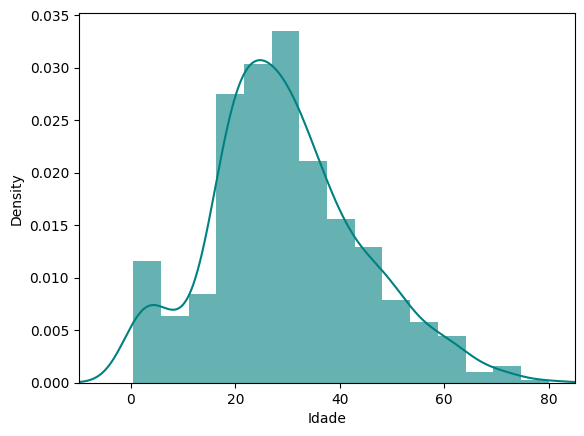

In [8]:
# Analisando as informações de Idade por um histograma
ax = df_treino["Idade"].hist(
    bins=15,
    density=True,
    stacked=True,
    color='teal',
    alpha=0.6
)
df_treino["Idade"].plot(kind='density', color='teal')
ax.set(xlabel='Idade')
plt.xlim(-10,85)
plt.show()

* Como "Idade" pode ser muito variante, usar a média pode nos dar resultados tendenciosos ao preencher as idades mais antigas do que o desejado. Para lidar com isso, usaremos a mediana para imputar os valores ausentes.

In [9]:
# Média (Idade)
print(
    'A média de "Idade" é %.0f'
    %(df_treino["Idade"].mean(skipna=True))
)

# Mediana (Idade)
print(
    'A mediana de "Idade" é %.0f'
    %(df_treino["Idade"].median(skipna=True))
)

A média de "Idade" é 30
A mediana de "Idade" é 28


##### Cabine - Valores ausentes

In [10]:
# Porcentagem de "nCabine" ausente
print(
    'A porcentagem de registros "nCabine" ausentes é %.2f%%'
    %((df_treino['nCabine'].isnull().sum()/df_treino.shape[0])*100)
)

A porcentagem de registros "nCabine" ausentes é 77.10%


* 77% dos registros estão faltando, o que significa que imputar informações e usar essa variável para previsão provavelmente não é sensato. Vamos ignorar essa variável em nosso modelo.

##### Embarcou - Valores ausentes

In [11]:
# Porcentagem de "Embarcou" ausente
print(
    'A porcentagem de registros "Embarcou" ausentes é %.2f%%'
    %((df_treino['Embarcou'].isnull().sum()/df_treino.shape[0])*100)
)

A porcentagem de registros "Embarcou" ausentes é 0.22%


* Faltam apenas 2 registros (0,22%) para "Embarcou", que podemos apenas imputar com o porto onde mais pessoas embarcaram.

Passageiros que Embarcaram por Porto
Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarcou, dtype: int64


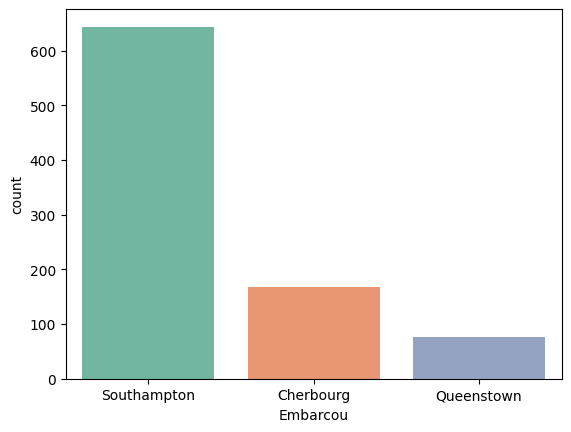

In [12]:
print('Passageiros que Embarcaram por Porto')
print(df_treino['Embarcou'].value_counts())
sns.countplot(x='Embarcou', data=df_treino, palette='Set2')
plt.show()

In [13]:
print(
    'O porto com maior número de embarques é %s.'
    %df_treino['Embarcou'].value_counts().idxmax()
)

O porto com maior número de embarques é Southampton.


* De longe, a maioria dos passageiros embarcaram em Southhampton, então vamos imputar esses 2 NaN's como "Southampton".

##### Ajustes Finais nos Dados (Treinar e Testar)

* Com base na minha avaliação dos valores ausentes no conjunto de dados, farei as seguintes alterações nos dados:

  * Se "Idade" estiver faltando para uma determinada linha, imputarei 28 (idade mediana).
  * Se "Embarked" estiver faltando para uma linha dividida, eu imputarei com "S" (a porta de embarque mais comum).

  * Vou ignorar "Cabin" como uma variável. Há muitos valores ausentes para imputação. Com base na informação disponível, verifica-se que este valor está associado à classe do passageiro e à tarifa paga.

In [14]:
# Finalizando os ajustes na base de dados de treino
treino = df_treino.copy()
treino["Idade"].fillna(
    df_treino["Idade"].median(skipna=True),
    inplace=True
)
treino["Embarcou"].fillna(
    df_treino['Embarcou'].value_counts().idxmax(),
    inplace=True
)
treino.drop('nCabine', axis=1, inplace=True)

In [15]:
# verifique os valores ausentes nos dados do trem ajustados
treino.isnull().sum()

PassengerId          0
Sobreviventes        0
Classe               0
Nome                 0
Sexo                 0
Idade                0
nIrmaos_Parceiros    0
nPais_Filhos         0
Bilhete              0
Tarifa               0
Embarcou             0
dtype: int64

In [16]:
# Visualizando a base de treino depois do ajuste
treino.head()

,PassengerId,Sobreviventes,Classe,Nome,Sexo,Idade,nIrmaos_Parceiros,nPais_Filhos,Bilhete,Tarifa,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


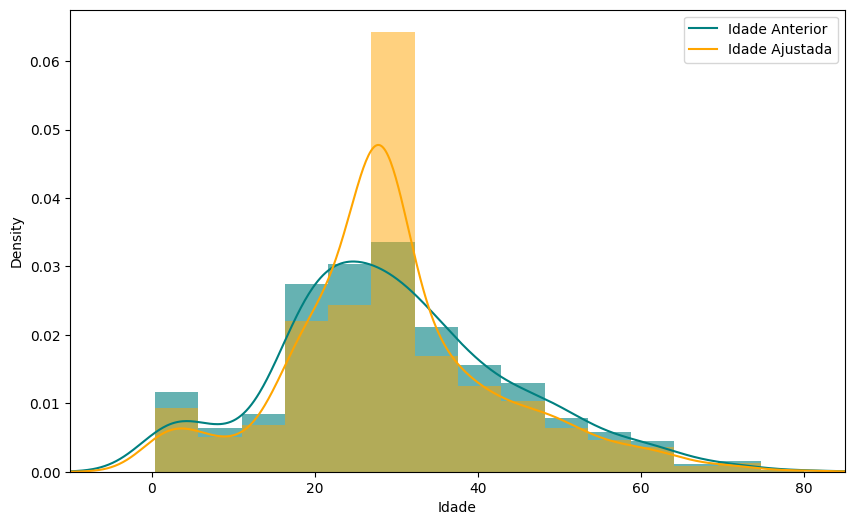

In [17]:
plt.figure(figsize=(10,6))
ax = df_treino["Idade"].hist(bins=15,
                             density=True,
                             stacked=True,
                             color='teal',
                             alpha=0.6)
df_treino["Idade"].plot(kind='density', color='teal')
ax = treino["Idade"].hist(bins=15,
                             density=True,
                             stacked=True,
                             color='orange',
                             alpha=0.5)
treino["Idade"].plot(kind='density', color='orange')
ax.legend(['Idade Anterior', 'Idade Ajustada'])
ax.set(xlabel='Idade')
plt.xlim(-10,85)
plt.show()

##### Variáveis Adicionais

* De acordo com o dicionário de dados Kaggle, tanto o **"nIrmaos_Parceiros"** quanto o **"nPais_Filhos"** estão relacionados a viagens com a família.

  * Para simplificar (e para levar em conta a possível multicolinearidade), combinarei o efeito dessas variáveis em um preditor categórico: se o indivíduo estava ou não viajando sozinho.

In [18]:
# Criando variável categórica para quem viajou sozinho
treino['ViajouSo']=np.where(
    (treino["nIrmaos_Parceiros"] + treino["nPais_Filhos"]) > 0, 0, 1
)
treino.drop('nIrmaos_Parceiros', axis=1, inplace=True)
treino.drop('nPais_Filhos', axis=1, inplace=True)

* Também criarei variáveis categóricas para Classe de passageiros ("Classe"), Genero ("Sexo") e Porto de embarque ("Embarcou").

In [19]:
# Criando variáveis categóricas e descartando algumas variáveis
training=pd.get_dummies(treino, columns=["Classe","Embarcou","Sexo"])
training.drop('Sexo_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Nome', axis=1, inplace=True)
training.drop('Bilhete', axis=1, inplace=True)

treino_final = training
treino_final.head()

,Sobreviventes,Idade,Tarifa,ViajouSo,Classe_1,Classe_2,Classe_3,Embarcou_Cherbourg,Embarcou_Queenstown,Embarcou_Southampton,Sexo_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


* Agora, aplicarei as mesmas alterações aos dados de teste.
    * Aplicarei a mesma imputação para "Idade" nos dados de Teste como fiz para meus dados de Treinamento (se ausente, Idade = 28).

    * Também removerei a variável "Cabin" dos dados de teste, pois decidi não incluí-la em minha análise.

    * Não havia valores ausentes na variável de porta "Embarked".

    * Vou adicionar as variáveis fictícias para finalizar o conjunto de teste.

    * Por fim, imputarei o valor 1 que falta para "Tarifa" com a mediana, 14,45.

In [20]:
# Analisando vazios
df_teste.isnull().sum()

PassengerId            0
Classe                 0
Nome                   0
Sexo                   0
Idade                 86
nIrmaos_Parceiros      0
nPais_Filhos           0
Bilhete                0
Tarifa                 1
nCabine              327
Embarcou               0
dtype: int64

In [21]:
# Ajustando df de teste
teste = df_teste.copy()
teste["Idade"].fillna(df_treino["Idade"].median(skipna=True), inplace=True)
teste["Tarifa"].fillna(df_treino["Tarifa"].median(skipna=True), inplace=True)
teste.drop('nCabine', axis=1, inplace=True)

# Criando variável categórica para quem viajou sozinho
teste['ViajouSo']=np.where(
    (teste["nIrmaos_Parceiros"]+teste["nPais_Filhos"]) > 0, 0, 1
)

# Criando variáveis categóricas
teste.drop('nIrmaos_Parceiros', axis=1, inplace=True)
teste.drop('nPais_Filhos', axis=1, inplace=True)

# Criando novas variáveis categóricas
testing = pd.get_dummies(teste, columns=["Classe","Embarcou","Sexo"])
testing.drop('Sexo_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Nome', axis=1, inplace=True)
testing.drop('Bilhete', axis=1, inplace=True)

# Finalizando a base de dados para teste
teste_final = testing
teste_final.head()

,Idade,Tarifa,ViajouSo,Classe_1,Classe_2,Classe_3,Embarcou_Cherbourg,Embarcou_Queenstown,Embarcou_Southampton,Sexo_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


### 3 Análise exploratória de dados

* Exploração da Idade

<ipython-input-22-f939b7e0fa91>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(treino_final["Idade"][treino_final.Sobreviventes == 1],
<ipython-input-22-f939b7e0fa91>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treino_final["Idade"][treino_final.Sobreviventes == 0],


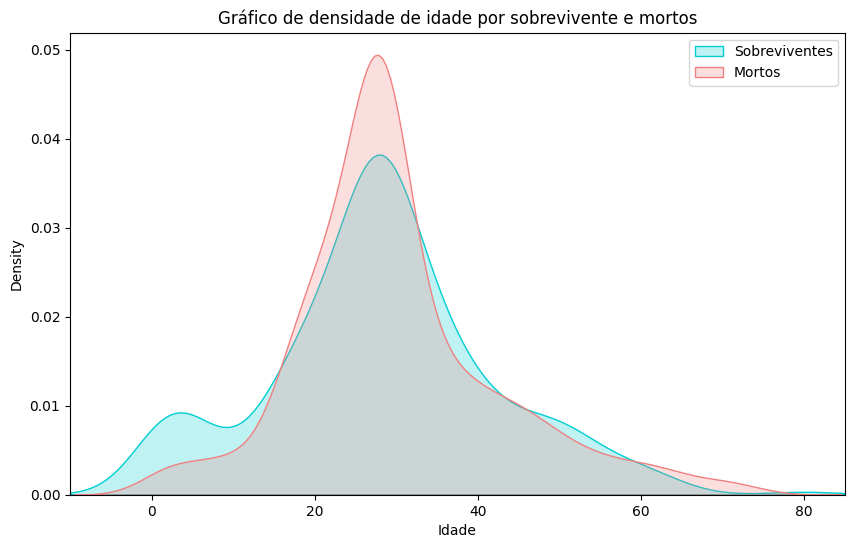

In [22]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(treino_final["Idade"][treino_final.Sobreviventes == 1],
                 color="darkturquoise", shade=True
                 )
sns.kdeplot(treino_final["Idade"][treino_final.Sobreviventes == 0],
            color="lightcoral", shade=True
            )
plt.legend(['Sobreviventes', 'Mortos'])
plt.title('Gráfico de densidade de idade por sobrevivente e mortos')
ax.set(xlabel='Idade')
plt.xlim(-10,85)
plt.show()

* A distribuição de idade para sobreviventes e mortos é realmente muito semelhante. Uma diferença notável é que, dos sobreviventes, uma proporção maior era de crianças. Os passageiros evidentemente tentaram salvar as crianças dando-lhes um lugar nos botes salva-vidas.

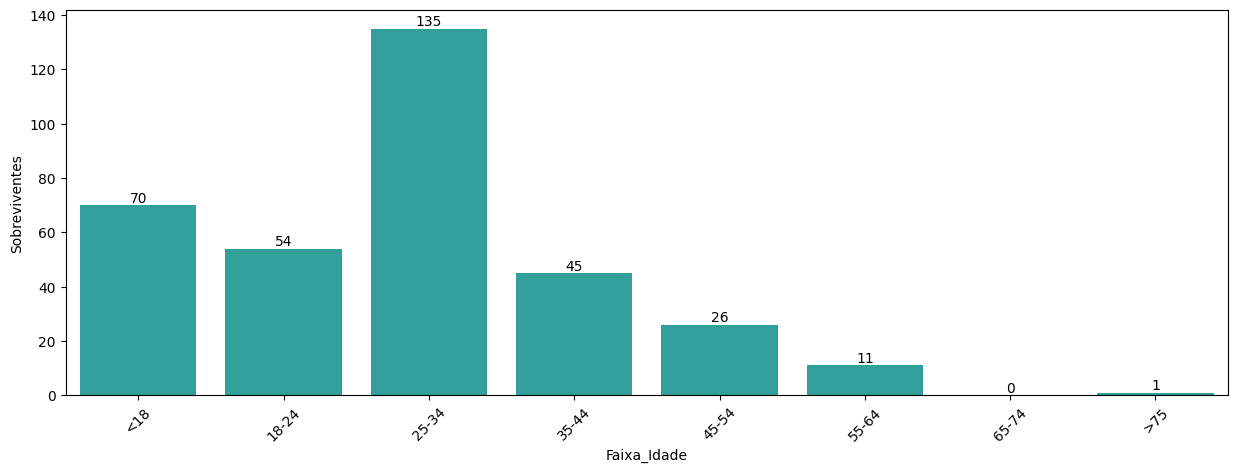

In [23]:
# Criando as variáveis de faixa e label
faixa = [0, 18, 25, 35, 45, 55, 65, 75, 80]
xticklabels = [
    "<18", "18-24", "25-34",
    "35-44", "45-54", "55-64",
    "65-74", ">75"
]

# Criando a coluna de faixa de idade
treino_final['Faixa_Idade'] = pd.cut(
    treino_final['Idade'],
    bins=faixa,
    labels=xticklabels
)

# Filtrando os dados com "Sobreviventes" igual a 1
filtro_sobreviventes = treino_final['Sobreviventes'] == 1
mediaIdade = treino_final[filtro_sobreviventes].groupby(
    'Faixa_Idade',
    as_index=False
)['Sobreviventes'].count()

plt.figure(figsize=(15, 5))
g = sns.barplot(x='Faixa_Idade',
                y='Sobreviventes',
                data=mediaIdade,
                order=xticklabels,
                color="LightSeaGreen"
)
g.set_xticklabels(xticklabels, rotation=45)

# Adicionar rótulos de dados em cada campo
for index, row in mediaIdade.iterrows():
    g.annotate(
        row['Sobreviventes'],
        xy=(
            index,
            row['Sobreviventes']
            ),
        ha='center',
        va='bottom'
    )

plt.show()

* Considerando a taxa de sobrevivência dos passageiros com menos de 18 anos, também incluirei outra variável categórica em meu conjunto de dados: **"Menor"**

In [24]:
treino_final['EhMenor']=np.where(treino_final['Idade']<=18, 1, 0)

teste_final['EhMenor']=np.where(teste_final['Idade']<=18, 1, 0)

* Exploração de Tarifa

<ipython-input-25-7c4a5ee5c477>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(treino_final["Tarifa"][treino_final.Sobreviventes == 1],
<ipython-input-25-7c4a5ee5c477>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treino_final["Tarifa"][treino_final.Sobreviventes == 0],


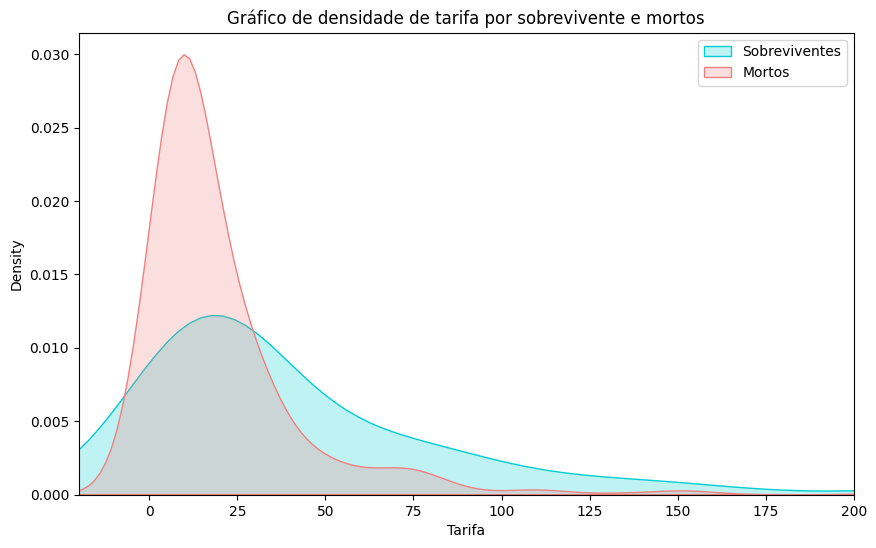

In [25]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(treino_final["Tarifa"][treino_final.Sobreviventes == 1],
                 color="darkturquoise",
                 shade=True
)
sns.kdeplot(treino_final["Tarifa"][treino_final.Sobreviventes == 0],
            color="lightcoral",
            shade=True
)
plt.legend(['Sobreviventes', 'Mortos'])
plt.title('Gráfico de densidade de tarifa por sobrevivente e mortos')
ax.set(xlabel='Tarifa')
plt.xlim(-20,200)
plt.show()

  Como as distribuições são claramente diferentes para as taxas de sobreviventes e mortos, é provável que isso seja um preditor significativo em nosso modelo final. Os passageiros que pagaram tarifas mais baixas parecem ter menos chances de sobreviver. Isso provavelmente está fortemente correlacionado com a classe de passageiros, que veremos a seguir.

* Exploração da classe de passageiros

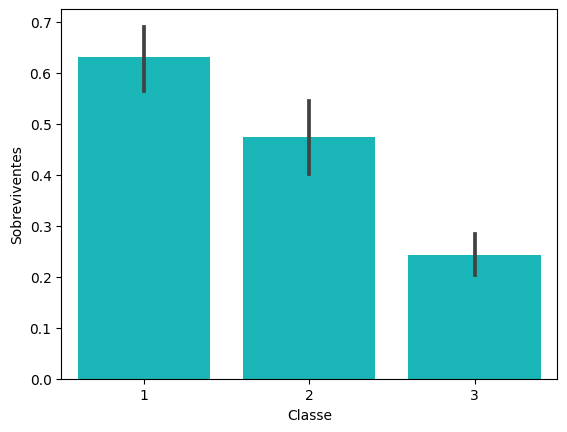

In [26]:
sns.barplot(
    x='Classe',
    y='Sobreviventes',
    data=df_treino,
    color="darkturquoise"
)
plt.show()


Sem surpresa, ser um passageiro de primeira classe era mais seguro.

* Exploração do Porto Embarcado

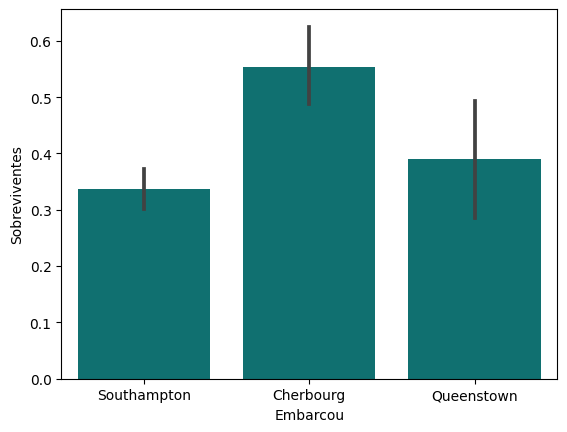

In [27]:
sns.barplot(
    x = 'Embarcou',
    y = 'Sobreviventes',
    data=df_treino,
    color="teal"
)
plt.show()

Os passageiros que embarcaram em Cherbourg, na França, parecem ter a maior taxa de sobrevivência.

Os passageiros que embarcaram em Southhampton tiveram uma probabilidade ligeiramente menor de sobreviver do que os que embarcaram em Queenstown. Isso provavelmente está relacionado à classe de passageiros, ou talvez até mesmo à ordem de atribuição dos quartos (por exemplo, talvez os passageiros anteriores tenham mais probabilidade de ter quartos mais próximos do convés).
Também vale a pena notar o tamanho dos marcadores nessas parcelas.

Como o número de passageiros que embarcaram em Southhampton foi maior, a confiança em torno da taxa de sobrevivência é a mais alta. O marcador do gráfico de Queenstown inclui a média de Southhampton, bem como o limite inferior de seu marcador.

É possível que os passageiros de Queenstown tenham tido o mesmo destino, ou até mais, do que os passageiros de Southhampton.

* Exploração de viajar sozinho versus com a família

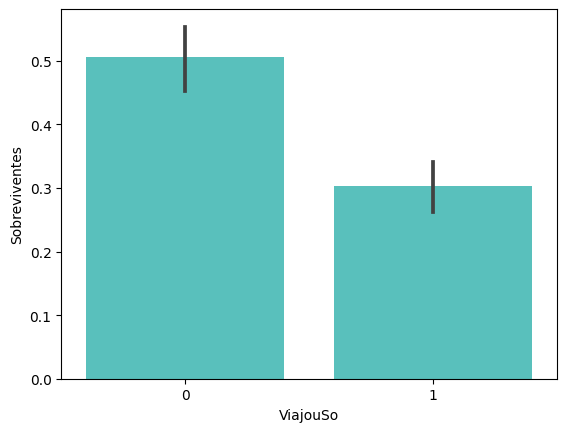

In [28]:
sns.barplot(
    x = 'ViajouSo',
    y = 'Sobreviventes',
    data=treino_final,
    color="mediumturquoise"
)
plt.show()

Indivíduos que viajavam sem família eram mais propensos a morrer no desastre do que aqueles com família a bordo. Dada a época, é provável que os indivíduos que viajaram sozinhos provavelmente sejam do sexo masculino.

* Exploração da Variável de Gênero

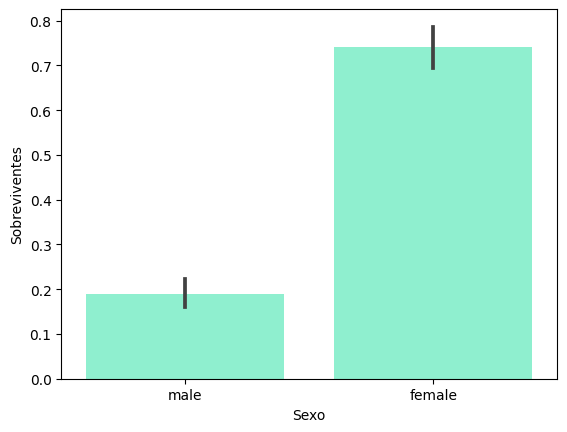

In [29]:
sns.barplot(
    x = 'Sexo',
    y = 'Sobreviventes',
    data=df_treino,
    color="aquamarine"
)
plt.show()

Esta é uma diferença muito óbvia. Claramente, ser mulher aumentava muito suas chances de sobrevivência.

# Iniciando o algoritmo

### 1 - Regressão Logística e Resultados

  * Seleção de recursos

* Eliminação de recursos recursivos

  * Dado um estimador externo que atribui pesos aos recursos, a eliminação recursiva de recursos (RFE) é selecionar recursos considerando recursivamente conjuntos de recursos cada vez menores. Primeiro, o estimador é treinado no conjunto inicial de recursos e a importância de cada recurso é obtida por meio de coef_ attribute ou por meio de feature_importances_ attribute. Em seguida, os recursos menos importantes são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto removido até que o número desejado de recursos a serem selecionados seja finalmente alcançado.

* Referências:
http://scikit-learn.org/stable/modules/feature_selection.html

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = [
    "Idade","Tarifa","ViajouSo","Classe_1","Classe_2",
    "Embarcou_Cherbourg","Embarcou_Southampton",
    "Sexo_male","EhMenor"
]
X = treino_final[cols]
y = treino_final['Sobreviventes']

# Construindo uma reglog e calculando as importâncias dos recursos
model = LogisticRegression()

# Criando o modelo RFE e selecionando os 8 atributos
rfe = RFE(estimator=model, n_features_to_select=8)
rfe = rfe.fit(X, y)

# resumindo a seleção dos atributos
print('Recursos selecionados: %s' % list(X.columns[rfe.support_]))

Recursos selecionados: ['Idade', 'ViajouSo', 'Classe_1', 'Classe_2', 'Embarcou_Cherbourg', 'Embarcou_Southampton', 'Sexo_male', 'EhMenor']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Treino, classificação de recursos com eliminação recursiva de recursos e validação cruzada

* O RFECV executa o RFE em um loop de validação cruzada para encontrar o número ideal ou o melhor número de recursos. A seguir, uma eliminação de recursos recursiva aplicada na regressão logística com ajuste automático do número de recursos selecionados com validação cruzada.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Número ideal de recursos: 9
Recursos selecionados: ['Idade', 'Tarifa', 'ViajouSo', 'Classe_1', 'Classe_2', 'Embarcou_Cherbourg', 'Embarcou_Southampton', 'Sexo_male', 'EhMenor']


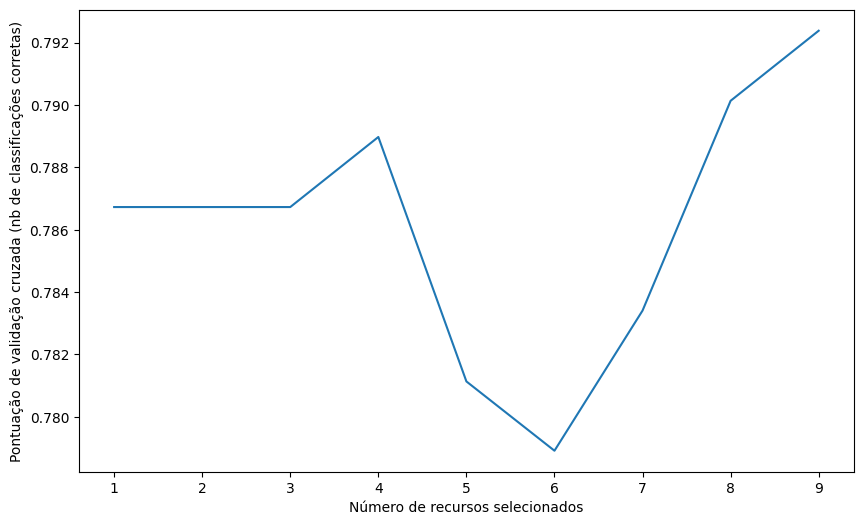

In [31]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# Criando um objeto RFECV e calculando uma pontuação de validação cruzada.
# A pontuação de "precisão" é proporcional ao número de classificações corretas
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=10,
    scoring='accuracy'
)
rfecv.fit(X, y)

print("Número ideal de recursos: %d" % rfecv.n_features_)
print('Recursos selecionados: %s' % list(X.columns[rfecv.support_]))

# Plotar o número de recursos VS. pontuações de validação cruzada
plt.figure(figsize=(10,6))
plt.xlabel("Número de recursos selecionados")
plt.ylabel("Pontuação de validação cruzada (nb de classificações corretas)")
plt.plot(range(
    1,
    len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score']
)
plt.show()

* Como vemos, oito variáveis foram mantidas.

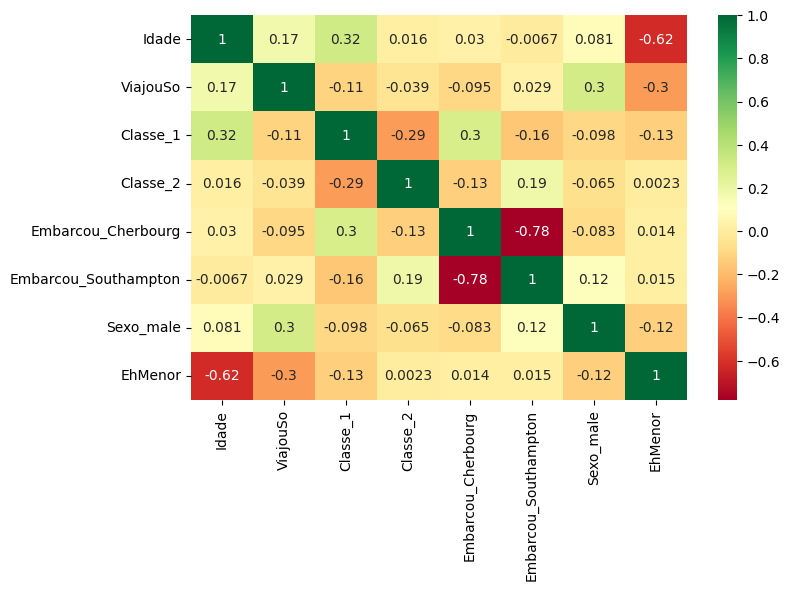

In [32]:
Selected_features = [
    'Idade', 'ViajouSo', 'Classe_1', 'Classe_2',
    'Embarcou_Cherbourg','Embarcou_Southampton',
    'Sexo_male','EhMenor'
]
X = treino_final[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Revisão dos procedimentos de avaliação do modelo

Motivação: precisa de uma maneira de escolher entre os modelos de aprendizado de máquina

O objetivo é estimar o desempenho provável de um modelo em dados fora da amostra
Ideia inicial: treinar e testar nos mesmos dados

Porém, maximizar a precisão do treinamento recompensa modelos excessivamente complexos que superajustam os dados de treinamento
Ideia alternativa: divisão de treinamento/teste

* Divida o conjunto de dados em duas partes, para que o modelo possa ser treinado e testado em dados diferentes
* A precisão do teste é uma estimativa melhor do que a precisão do treinamento do desempenho fora da amostra
* Problema com a divisão de treinamento/teste
ele fornece uma estimativa de alta variância, pois alterar quais observações estão no conjunto de teste pode alterar significativamente a precisão do teste
* A precisão do teste pode mudar muito, dependendo de qual observação está no conjunto de teste
Referência:
http://www.ritchieng.com/machine-learning-cross-validation/

#### Avaliação do modelo com base na divisão simples de treinamento/teste usando a função train_test_split()

Resultados da divisão de treinamento/teste:
LogisticRegression precisão é 0.777
LogisticRegression log_loss é 0.506
LogisticRegression auc é 0.835


<ipython-input-33-4a34f60faf93>:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
<ipython-input-33-4a34f60faf93>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


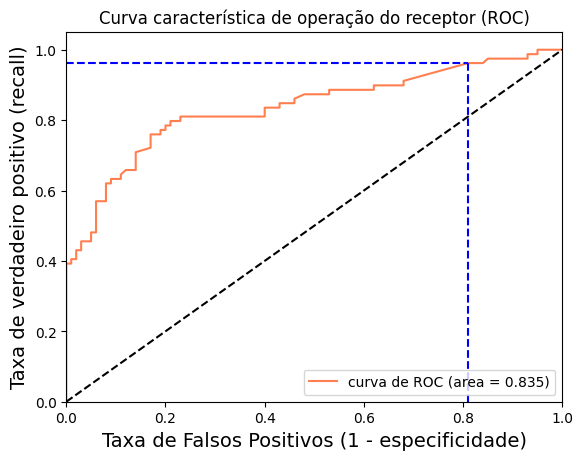


Usando um limite de 0.074 garante uma sensibilidade de 0.962 e uma especificidade de 0.190, ou seja, uma taxa de falsos positivos de 81.00%.


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# criando X (recursos) e y (resposta)
X = treino_final[Selected_features]
y = treino_final['Sobreviventes']

# use a divisão train/test com diferentes valores random_state
# podemos alterar os valores random_state que alteram as pontuações de precisão
# as pontuações mudam muito, é por isso que testar as pontuações é uma estimativa de alta variância
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# verifique as pontuações de classificação da regressão logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Resultados da divisão de treinamento/teste:')
print(logreg.__class__.__name__+" precisão é %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss é %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc é %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='curva de ROC (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - especificidade)', fontsize=14)
plt.ylabel('Taxa de verdadeiro positivo (recall)', fontsize=14)
plt.title('Curva característica de operação do receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

print("\nUsando um limite de %.3f " % thr[idx] + "garante uma sensibilidade de %.3f " % tpr[idx] +
      "e uma especificidade de %.3f" % (1-fpr[idx]) +
      ", ou seja, uma taxa de falsos positivos de %.2f%%." % (np.array(fpr[idx])*100))

### Avaliação do modelo com base na validação cruzada K-fold usando a função cross_val_score()

In [34]:
# Regressão logística de validação cruzada de 10 vezes
logreg = LogisticRegression()

# Use a função cross_val_score
# Estamos passando a totalidade de X e y, não X_train ou y_train, ele se encarrega de dividir os dados
# cv=10 para 10 dobras
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} para métrica de avaliação - embora sejam muitos
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

K-fold cross-validation results:
LogisticRegression average accuracy is 0.790
LogisticRegression average log_loss is 0.456
LogisticRegression average auc is 0.847


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Resultados da validação cruzada K-fold:
  * A precisão média da LogisticRegression é de 0,802
  * Log_loss médio de LogisticRegression é 0,454
  * LogisticRegression auc médio é 0,850

### Avaliação do modelo com base na validação cruzada K-fold usando a função cross_validate()

In [35]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

K-fold cross-validation results:
LogisticRegression average accuracy: 0.790 (+/-0.026)
LogisticRegression average log_loss: 0.456 (+/-0.037)
LogisticRegression average auc: 0.847 (+/-0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Resultados da validação cruzada K-fold:
  * Precisão média da LogisticRegression: 0,802 (+/-0,025)
  * Log_loss médio de LogisticRegression: 0,454 (+/-0,034)
  * Auc médio de regressão logística: 0,850 (+/-0,024)

* O que acontece quando adicionamos o recurso "Tarifa"?

In [36]:
cols = ["Idade","Tarifa","ViajouSo","Classe_1","Classe_2","Embarcou_Cherbourg","Embarcou_Southampton","Sexo_male","EhMenor"]
X = treino_final[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, treino_final[cols], y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

K-fold cross-validation results:
LogisticRegression average accuracy: 0.792 (+/-0.028)
LogisticRegression average log_loss: 0.458 (+/-0.038)
LogisticRegression average auc: 0.845 (+/-0.029)


* Resultados da validação cruzada K-fold:
  * Precisão média da LogisticRegression: 0,796 (+/-0,028)
  * Log_loss médio de LogisticRegression: 0,455 (+/-0,034)
  * Auc médio de regressão logística: 0,849 (+/-0,025)

* Notamos que o modelo está ligeiramente deteriorado. A variável "Fare" não carrega nenhuma informação útil. Sua presença é apenas um ruído para o modelo de regressão logística.

### GridSearchCV avaliando usando vários pontuadores simultaneamente

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

melhores parâmetros: LogisticRegression(C=2.60001)
melhores parâmetros: {'C': 2.60001}
melhor pontuação: 0.7968789013732834


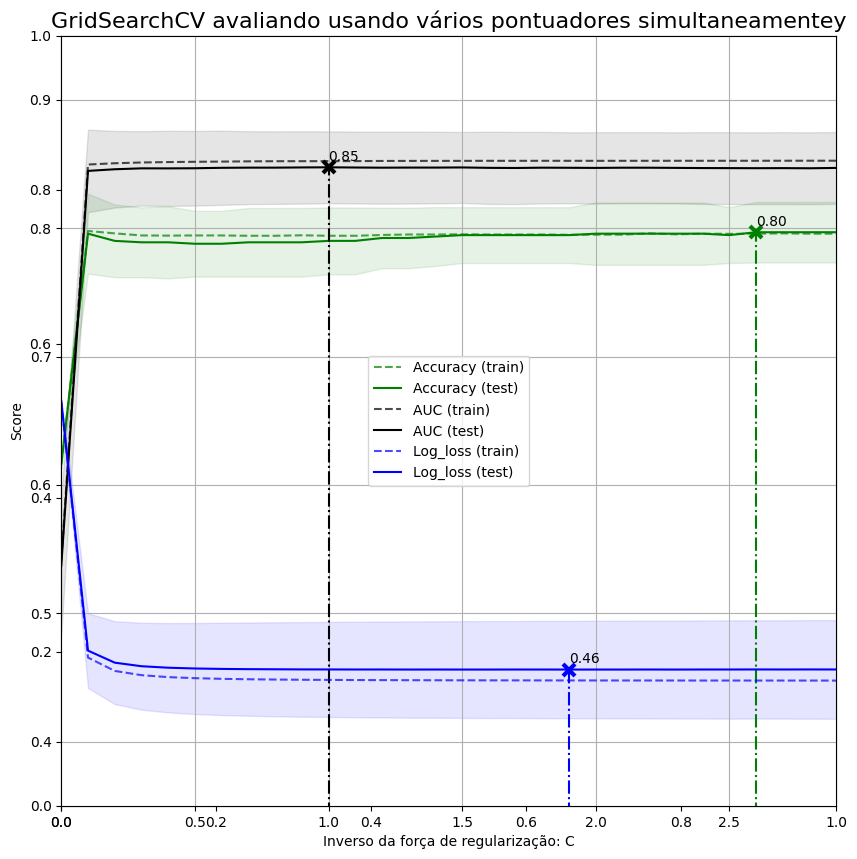

In [37]:
from sklearn.model_selection import GridSearchCV

X = treino_final[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("melhores parâmetros: " + str(gs.best_estimator_))
print("melhores parâmetros: " + str(gs.best_params_))
print('melhor pontuação:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV avaliando usando vários pontuadores simultaneamentey",fontsize=16)

plt.xlabel("Inverso da força de regularização: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

### Avaliação de GridSearchCV usando vários pontuadores, RepeatedStratifiedKFold e pipeline para pré-processamento simultaneamente

* Podemos aplicar muitas tarefas juntas para uma avaliação mais aprofundada, como gridsearch usando validação cruzada com base em k-folds repetidos muitas vezes, que podem ser dimensionados ou não em relação a muitos pontuadores e ajuste de parâmetro para um determinado estimador!

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

melhores parâmetros: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.10001))])
melhores parâmetros: {'clf__C': 0.10001}
melhores pontuações: 0.7946130186428975


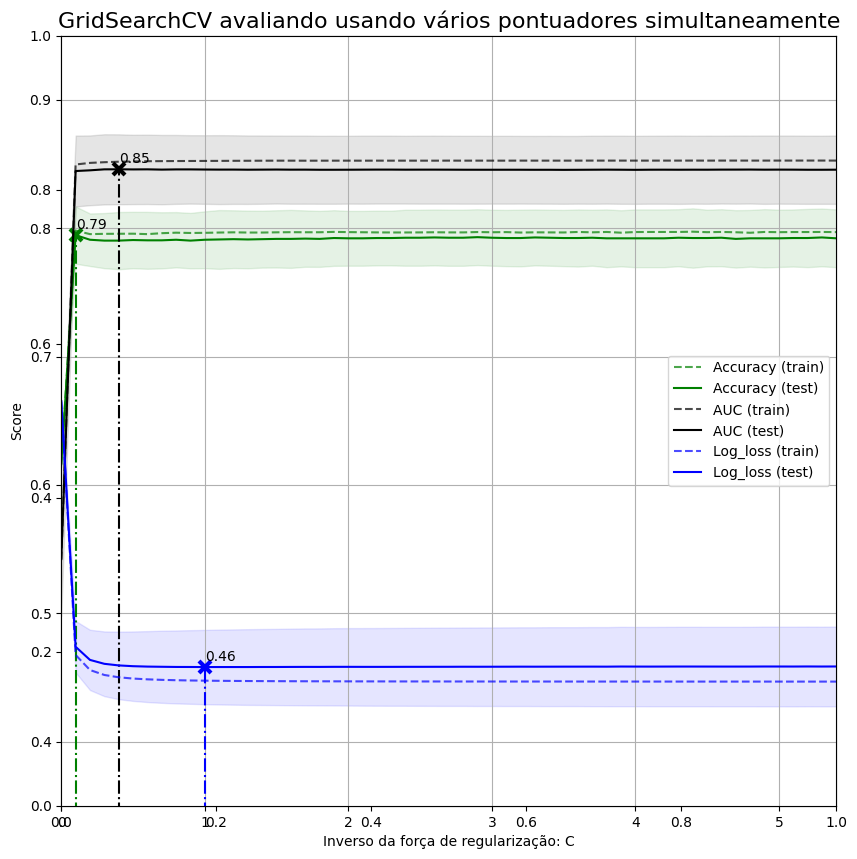

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("melhores parâmetros: " + str(log_clf.best_estimator_))
print("melhores parâmetros: " + str(log_clf.best_params_))
print('melhores pontuações:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV avaliando usando vários pontuadores simultaneamente",fontsize=16)

plt.xlabel("Inverso da força de regularização: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max())
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [39]:
teste_final['Sobreviventes'] = log_clf.predict(teste_final[Selected_features])
teste_final['PassengerId'] = df_teste['PassengerId']

submission = teste_final[['PassengerId','Sobreviventes']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Sobreviventes
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
